In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
from scipy import stats
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import pickle
import csv

In [11]:
rlist = []
records = os.path.normpath('mit-bih-dataframes/subject_list.csv')
with open(records) as rfile: #Then we open the file 
                             #The 'with' command only opens the file while we are in it. Automatically closes the file when we're not    
    recordreader = csv.reader(rfile, delimiter=' ', quotechar='|')
    for row in recordreader:
        rlist.append(row[0])

In [28]:
rlist

['04015',
 '04043',
 '04048',
 '04126',
 '04746',
 '04908',
 '04936',
 '05091',
 '05121',
 '05261',
 '06426',
 '06453',
 '06995',
 '07162',
 '07859',
 '07879',
 '07910',
 '08215',
 '08219',
 '08378',
 '08405',
 '08434',
 '08455']

In [12]:
subject_dfs = {}
for x in tqdm(rlist):
    subject_dfs[x] = pd.read_csv(os.path.normpath('mit-bih-dataframes/'+x+'.csv'), index_col=0)

100%|██████████| 23/23 [01:34<00:00,  4.11s/it]


In [13]:
feature_dfs = {}
for x in tqdm(rlist):
    feature_dfs[x] = pd.read_csv(os.path.normpath('mit-bih-time-features/'+x+'.csv'), index_col=0)

100%|██████████| 23/23 [00:00<00:00, 30.23it/s]


In [14]:
count_dict = {
    'subjectID': [],
    'total_samples': [],
    'normal_freq': [],
    'afib_freq': [],
    'other_freq': []
}
for subject in tqdm(rlist):
    subject_df = subject_dfs[subject]
    count_dict['subjectID'].append(subject)
    count_dict['total_samples'].append(len(subject_df))

    length = len(subject_df)
    normal_count = len(subject_df[subject_df['Normal']==True])
    afib_count = len(subject_df[subject_df['AFIB']==True])
    other_count = len(subject_df[subject_df['Other']==True])

    count_dict['normal_freq'].append(np.round(normal_count/length*100, 3))
    count_dict['afib_freq'].append(np.round(afib_count/length*100, 3))
    count_dict['other_freq'].append(np.round(other_count/length*100, 3))

count_df = pd.DataFrame(count_dict).set_index('subjectID')
count_df

100%|██████████| 23/23 [00:13<00:00,  1.69it/s]


,total_samples,normal_freq,afib_freq,other_freq
subjectID,,,,
04015,9205760,99.355,0.644,0.000
04043,9205760,78.457,21.507,0.036
04048,9205760,99.018,0.980,0.002
04126,9205760,96.256,3.742,0.002
04746,9205760,46.899,53.100,0.001
04908,9205760,90.940,8.371,0.689
04936,9205760,18.660,72.131,9.209
05091,9205760,99.764,0.236,0.001
05121,9205760,36.347,63.028,0.624


In [108]:
def plot_pie_plot(selection, nrows, ncols):
    plt.figure(figsize=(24, 16), constrained_layout=True)

    for idx, x in enumerate(selection):
        ax = plt.subplot(nrows, ncols, idx + 1)
        ax.set_title('Subject '+str(x), fontsize=26)
        ax.set_facecolor('white')

        normal_data = count_df.loc[x]['normal_freq']
        afib_data = count_df.loc[x]['afib_freq']
        other_data = count_df.loc[x]['other_freq']
        ax.pie([normal_data, afib_data, other_data], 
                autopct=lambda p: '{:.1f}%'.format(round(p, 1)) if p > 0.1 else '',
                shadow=True, colors=['darkcyan', 'orange', 'salmon'],
                startangle=90, textprops={'fontsize': 24, 'color': 'black'},
                pctdistance=1.15)

    plt.suptitle('Rhythm Breakdowns', fontsize=36)#, y=0.98)

    normal_patch = mpatches.Patch(color='darkcyan', label='Normal')
    afib_patch = mpatches.Patch(color='orange', label='Afib')
    other_patch = mpatches.Patch(color='salmon', label='Other')
    plt.figlegend([normal_patch, afib_patch, other_patch], 
                ['Normal', 'Afib', 'Other'],
                fontsize=28, 
                loc='lower right', 
                shadow = True)

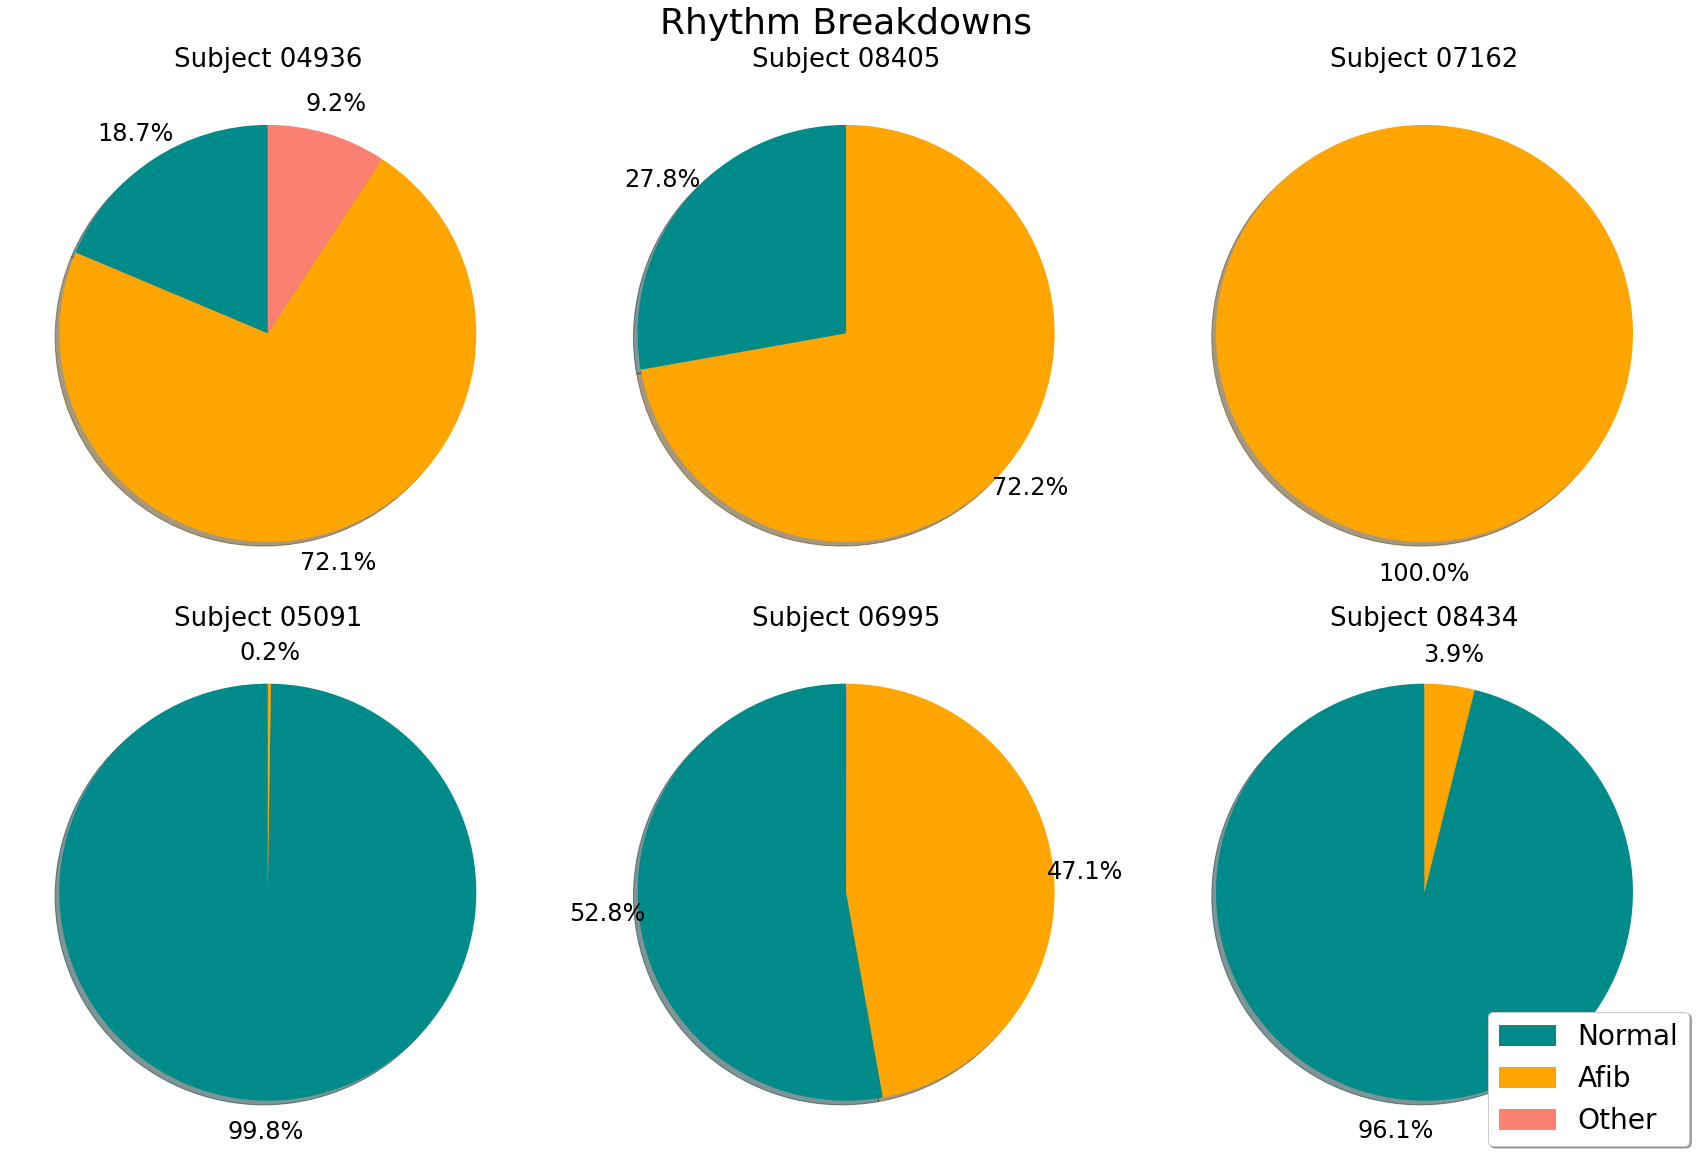

In [110]:
plot_pie_plot(['04936', '08405','07162','05091','06995','08434'], 2, 3)